    X1   X2
0  5.9  3.2
1  4.6  2.9
2  6.2  2.8
3  4.7  3.2
4  5.5  4.2
5  5.0  3.0
6  4.9  3.1
7  6.7  3.1
8  5.1  3.8
9  6.0  3.0
[[5.9 3.2]
 [4.6 2.9]
 [6.2 2.8]
 [4.7 3.2]
 [5.5 4.2]
 [5.  3. ]
 [4.9 3.1]
 [6.7 3.1]
 [5.1 3.8]
 [6.  3. ]]
Initial Centroids
(3, 2)
[[0. 0.]
 [0. 0.]
 [0. 0.]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
12.537144692236463
 Centre of the clusters after  1  Iteration 
 [[5.1714287 3.1714287]
 [5.5       4.2      ]
 [6.45      2.95     ]]
Error  ...  1.5886393
[0. 0. 2. 0. 1. 0. 0. 2. 0. 0.]
 Centre of the clusters after  2  Iteration 
 [[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]
Error  ...  0.5484787
[2. 0. 2. 0. 1. 0. 0. 2. 1. 2.]
 Centre of the clusters after  3  Iteration 
 [[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]
Error  ...  0.0
[2. 0. 2. 0. 1. 0. 0. 2. 1. 2.]


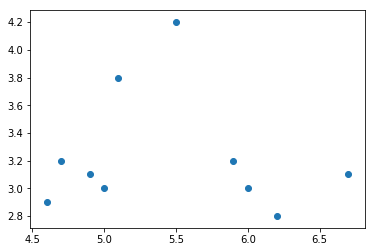

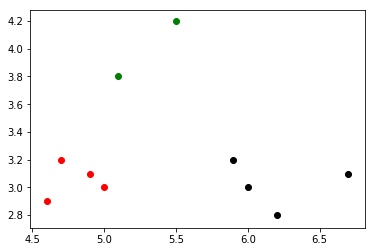

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy


def euclidean(a,b, ax=1):
    return np.linalg.norm(a-b, axis=ax)


def main():
    k = 3
    X = pd.read_csv('kmeans.csv',index_col=False)
    print(X)

    x1 = X['X1'].values
    x2 = X['X2'].values
    X = np.array(list(zip(x1, x2)))
    print(X)
    C_x = [6.2, 6.6 ,6.5]
    C_y = [3.2, 3.7, 3.0]
    Centroid = np.array(list(zip(C_x, C_y)), dtype=np.float32)
    print("Initial Centroids")
    print(Centroid.shape)

    Centroid_old = np.zeros(Centroid.shape)
    print(Centroid_old)
    # Cluster Lables(0, 1, 2)
    clusters = np.zeros(len(X))
    print(clusters)
    error = euclidean(Centroid, Centroid_old, None)
    print(error)
    iterr = 0
    # Loop will run till the error becomes zero
    while error != 0:
        # Assigning each value to its closest cluster
        iterr = iterr + 1
        for i in range(len(X)):
            #print(X[i])
            distances = euclidean(X[i], Centroid)
            #print(distances)
            cluster = np.argmin(distances)
            clusters[i] = cluster

        Centroid_old = deepcopy(Centroid)
        
        # Finding the new centroids by taking the Mean
        for p in range(k):
            points = [X[j] for j in range(len(X)) if clusters[j] == p]
            Centroid[p] = np.mean(points, axis=0)
        print(" Centre of the clusters after ", iterr," Iteration \n", Centroid)
        error = euclidean(Centroid, Centroid_old, None)
        print("Error  ... ",error)  
        print(clusters)
    
    plt.scatter(x1, x2)
    plt.show()
    
    fl0 = X[clusters==0]
    fl1 = X[clusters==1]
    fl2 = X[clusters==2]
    
    plt.scatter(fl0[:,0],fl0[:,1],color="red")
    plt.scatter(fl1[:,0],fl1[:,1],color="green")
    plt.scatter(fl2[:,0],fl2[:,1],color="black")

if __name__ == "__main__": 
    main()


